In [13]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [21]:
import dataload
import pprint
import datetime
from keras.models import load_model
from train import plot_results_multiple

In [70]:
def main():    
    
    # Original 4 pipelines
    model = load_model('single_gru_after_cnn_1542783564/seq_len_50/model-3.h5')
    
    # 2 New pipelines for Bidir GRU
    #model = load_model('../final_sem_code/single_cnn_bidir_gru_1548982892/seq_len_50/model-3.h5')
    
    seq_len = 50
    predict_len = 7

    
        
    
    
    
    date_ranges = [ (datetime.date(2016,1,1),datetime.date(2016,6,1)),
                    (datetime.date(2017,1,1),datetime.date(2017,6,1)),
                    (datetime.date(2018,1,1),datetime.date(2018,6,1))]
    
    
    '''
    date_ranges = [(datetime.date(2015,1,1),datetime.date(2015,12,31)),                   
                   (datetime.date(2016,1,1),datetime.date(2016,12,31)),
                   (datetime.date(2017,1,1),datetime.date(2017,12,31))]
    '''
    
    #test_data = [dataload.load_data('daily_spx.csv', seq_len, normalise_window=True, smoothing=False, date_range=date_range, train=False) for date_range in date_ranges]
    test_data = [dataload.load_data('../2018_data/Yahoo_2000_to_2018.csv', seq_len, normalise_window=True, smoothing=False, date_range=date_range, train=False) for date_range in date_ranges]

    predictions = [dataload.predict_sequences_multiple(model, test[0], seq_len, predict_len) for test in test_data]
    scores = [model.evaluate(test[0], test[1], verbose=0) for test in test_data]

    for prediction_index in range(len(predictions)):
        for sequence_index in range(len(predictions[prediction_index])):
            predictions[prediction_index][sequence_index] = dataload.denormalize_sequence(test_data[prediction_index][2][sequence_index*7], predictions[prediction_index][sequence_index])

    for test_data_index in range(len(test_data)):
        for y_index in range(len(test_data[test_data_index][1])):
            test_data[test_data_index][1][y_index] = dataload.denormalize_point(test_data[test_data_index][2][y_index], test_data[test_data_index][1][y_index])

    model_plot = [(predictions[0], '2016'), (predictions[1], '2017'), (predictions[2], '2018')]
    
    #model_plot = [(predictions[0], 'Mar 2002 to Aug 2002'), (predictions[1], 'Mar 2015 to Aug 2015'),(predictions[2], 'Jan 2016 to Apr 2017')]
    #model_plot = [(predictions[0], 'Bullish'), (predictions[1], 'Bearish'), (predictions[2], 'Neutral')]
    results_fname = 'test_single_cnn_bidir_gru_{}'.format(int(datetime.datetime.now().timestamp()))
    #os.makedirs(results_fname)
    plot_results_multiple(model_plot, [t[1] for t in test_data], predict_len, fig_path = 'plots_test/plots.pdf')
    with open('plots_test' + "/score.txt", "w") as fout:
        for score in scores:
            pprint.pprint(score, fout)


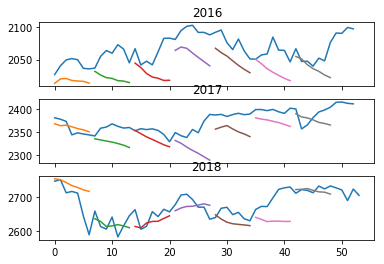

In [71]:
if __name__ == '__main__':
    main()